In [1]:
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

-05_075_-1.png*        image_1_4.png*         image_2_6.png*
05_025_025.png*        image_1_5.png*         image_2_7.png*
05_025_075.png*        image_1_6.png*         image_2_8.png*
05_075_075.png*        image_1_7.png*         image_2_9.png*
IVR_assignment.pdf*    image_1_8.png*         ivr_01.ipynb
detectBlob.py*         image_1_9.png*         ivr_011.ipynb
detect_blob.py*        image_1_copy.png*      ivr_012.ipynb
image1.py*             image_2_1.png*         labs/
image2.py*             image_2_2.png*         sheep.jpg
image_1_1.png*         image_2_3.png*         target_move.py*
image_1_2.png*         image_2_4.png*         video_capture.py*
image_1_3.png*         image_2_5.png*         video_filter_color.py*


In [3]:
def printImgCol(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    
def printImgGray(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [4]:
img = cv2.imread('image_1_2.png',1)

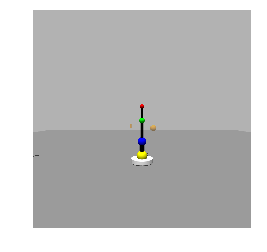

(800, 800, 3)


In [5]:
printImgCol(img)
print(img.shape)

In [6]:
def detect_red(image):
    # Isolate the blue colour in the image as a binary image
    mask = cv2.inRange(image, (0, 0, 100), (0, 0, 255))
    # This applies a dilate that makes the binary region larger (the more iterations the larger it becomes)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3)
    # Obtain the moments of the binary image
    M = cv2.moments(mask)
    # Calculate pixel coordinates for the centre of the blob
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    return np.array([cx, cy])

In [7]:
detect_red(img)

array([400, 357])

In [8]:
## create mask for color

In [9]:
# red
#mask = cv2.inRange(img, (0, 0, 100), (20, 20, 255))
# green
#mask = cv2.inRange(img, (0, 100, 0), (20, 255, 20))
# blue
#mask = cv2.inRange(img, (100, 0, 0), (255, 20, 20))
# yellow
#mask = cv2.inRange(img, (0, 100, 100), (20, 255, 255))
# orange
mask = cv2.inRange(img, (80, 100, 120), (110, 190, 210))

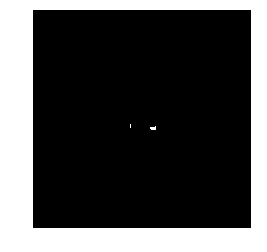

(800, 800)


In [10]:
printImgGray(mask)
print(mask.shape)

In [11]:
cv2.imwrite('sheep.jpg', mask)

True

In [12]:
kernel = np.ones((5, 5), np.uint8)

In [13]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [14]:
mask2 = cv2.dilate(mask, kernel, iterations=3)

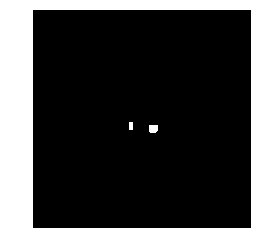

(800, 800)


In [50]:
printImgGray(mask2)
print(mask2.shape)

In [51]:
def find_obj_img(im_th):
    '''
        find objects in image
        in:     im_th           (grayscale image)
        out:    rects           (coordinates of detected objects)
    '''
    # Find contours in the image
    im2, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Get rectangles contains each contour
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [64]:
def get_object(im_th, rect, mach=False):
    '''
        rectangular region -> cut -> delete other objets from image -> resize
        in:     im_th           (grayscale image)
                rects           (coordinates of detected objects)
        out:    roi             (object image)
    '''
    # Draw the rectangles
    #cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    #roi = im_th[pt1:pt1+leng, pt2:pt2+leng]

    roi_1 = im_th[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]]
    roi_2 = im_th[pt1:pt1+leng, pt2:pt2+leng]

    # check if object is bigger then a certain size
    if ((roi_2.shape[0] >= 10) & (roi_2.shape[1] >= 10)) | (mach == True):

        # make border
        BLACK = [0, 0, 0]

        # define borders
        y_ax = int((roi_2.shape[0] - roi_1.shape[0])/2) if roi_2.shape[0] > roi_1.shape[0] else 0
        x_ax = int((roi_2.shape[1] - roi_1.shape[1])/2) if roi_2.shape[1] > roi_1.shape[1] else 0

        # make borders around element
        roi = cv2.copyMakeBorder(roi_1, y_ax, y_ax, x_ax, x_ax, cv2.BORDER_CONSTANT, value=BLACK)
        #print(roi.shape)

        roi = cv2.resize(roi, (28, 28))#, interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (3, 3))
    else:
        roi = np.zeros((28,28))

    return(roi)

In [57]:
rect = find_obj_img(im_gray)

In [58]:
rect

In [55]:
im_gray = cv2.GaussianBlur(mask2, (5, 5), 0)

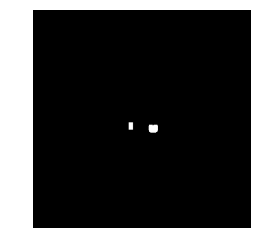

(800, 800)


In [56]:
printImgGray(im_gray)
print(im_gray.shape)

In [71]:
im2, contours, hierarchy = cv2.findContours(mask2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [72]:
#im2, ctrs, hier = cv2.findContours(mask2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [73]:
contours

[array([[[426, 421]],
 
        [[425, 422]],
 
        [[425, 424]],
 
        [[424, 425]],
 
        [[424, 440]],
 
        [[425, 441]],
 
        [[425, 443]],
 
        [[426, 444]],
 
        [[426, 445]],
 
        [[428, 447]],
 
        [[430, 447]],
 
        [[431, 448]],
 
        [[431, 449]],
 
        [[451, 449]],
 
        [[451, 448]],
 
        [[452, 447]],
 
        [[453, 447]],
 
        [[456, 444]],
 
        [[456, 442]],
 
        [[457, 441]],
 
        [[457, 425]],
 
        [[456, 424]],
 
        [[456, 422]],
 
        [[455, 421]],
 
        [[443, 421]],
 
        [[440, 424]],
 
        [[438, 422]],
 
        [[438, 421]]], dtype=int32), array([[[351, 412]],
 
        [[351, 438]],
 
        [[366, 438]],
 
        [[366, 412]]], dtype=int32)]

In [74]:
rects = [cv2.boundingRect(ctr) for ctr in contours]

In [75]:
rects[0]

(424, 421, 34, 29)

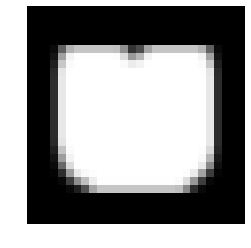

(28, 28)


In [76]:
im_obj1 = get_object(im_gray, rects[0])
printImgGray(im_obj1)
print(im_obj1.shape)

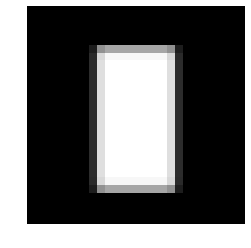

(28, 28)


In [77]:
im_obj2 = get_object(im_gray, rects[1])
printImgGray(im_obj2)
print(im_obj2.shape)

In [166]:
rects[0]

(424, 421, 34, 29)

In [79]:
maskimg = mask2.copy()

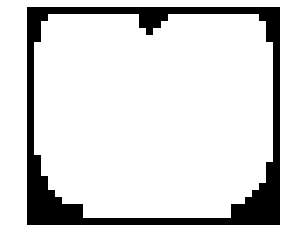

(31, 36)


In [115]:
x = maskimg[421-1:421+30,424-1:424+35]
printImgGray(x)
print(x.shape)

In [117]:
M = cv2.moments(x)

In [120]:
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX, cY)

17 14


In [119]:
cX

17

In [140]:
xx = x.copy()

In [141]:
xx[14,17] = 125

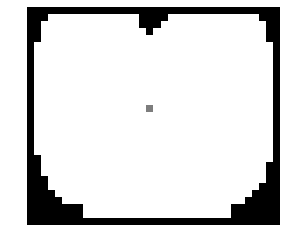

(31, 36)


In [142]:
printImgGray(xx)
print(xx.shape)

In [160]:
# print middle to image

In [170]:
mask3 = mask2.copy()
cv2.circle(mask3, (424+17, 421+14), 1, (125), 1)
cv2.circle(mask3, (359, 426), 1, (125), 1)
cv2.imwrite('sheep1.jpg', mask3)

True

In [16]:
M = cv2.moments(mask2)

In [17]:
M

{'m00': 343740.0,
 'm01': 148328145.0,
 'm02': 64033876965.0,
 'm03': 27655933117635.0,
 'm10': 142398375.0,
 'm11': 61505699355.0,
 'm12': 26577533054865.0,
 'm20': 59517237405.0,
 'm21': 25729629296985.0,
 'm30': 25078752236175.0,
 'mu02': 28411790.330116272,
 'mu03': -12433328.72265625,
 'mu11': 59004717.29599762,
 'mu12': -183083179.62867928,
 'mu20': 527020372.8227005,
 'mu21': -1696040563.2385864,
 'mu30': -13618684651.527344,
 'nu02': 0.00024045757103071286,
 'nu03': -1.794784186761457e-07,
 'nu11': 0.0004993747608122454,
 'nu12': -2.6428545644481284e-06,
 'nu20': 0.004460332744266337,
 'nu21': -2.4482798218466836e-05,
 'nu30': -0.00019658934789130498}

In [18]:
cx = int(M['m10'] / M['m00'])

In [19]:
cx

414